<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy

## Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [51]:
t=np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i=np.array([3.10, 3.12, 3.14, 3.18, 3.24])

In [52]:
data={'Tiempo(s)':t, 'Corriente(A)':i}
df=pd.DataFrame(data)
df

,Tiempo(s),Corriente(A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


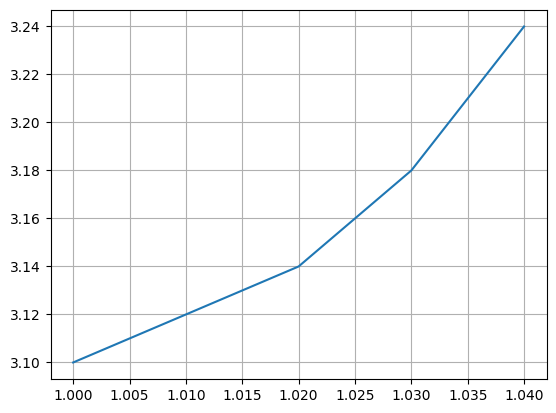

In [53]:
plt.plot(df['Tiempo(s)'], df['Corriente(A)'])
plt.grid()

In [54]:
derivada =np.gradient(i,t)
derivada

array([2., 2., 3., 5., 6.])

In [55]:
di=np.diff(i)
dt=np.diff(t)
d=di/dt
d

array([2., 2., 4., 6.])

In [56]:
L=0.98
R=0.142
E_t= L*derivada+ R*i
df['fem(V)']=E_t

In [57]:
df

,Tiempo(s),Corriente(A),fem(V)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

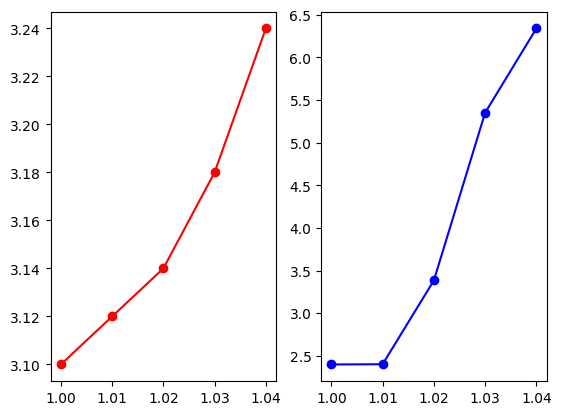

In [58]:
fig, axs = plt.subplots(1,2)
axs[0].plot(df['Tiempo(s)'], df['Corriente(A)'], 'ro-')
axs[1].plot(df['Tiempo(s)'], df['fem(V)'], 'bo-')
plt.grid

Polinomio dre lagrange

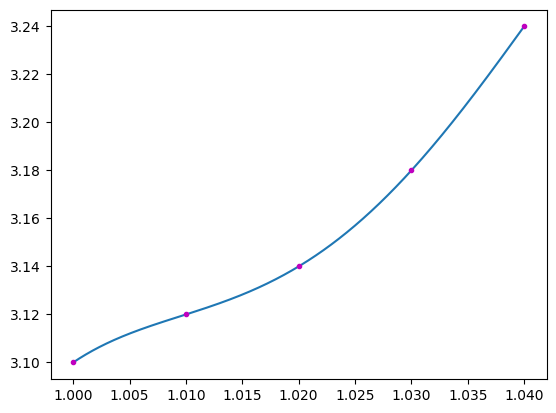

In [59]:
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
Pl= lagrange(t,i)
x1=np.linspace(min(t), max(t),1000)
plt.plot(x1, Pl(x1))
plt.plot(t,i,"m.")


In [60]:
def Dif_(f, x,h):
  derivada = (-3*f(x)+4*f(x-h))/(2*h)

## Parte 2
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales



*   ### Regla del Trapecio

 Se basa en aproximar el área bajo una curva por la suma de áreas de trapecios.

#### Fórmula

La fórmula general para la regla del trapecio es:
$$
P(x)=f(a)L_0(x) + f(b)L_1(x)
$$
donde
$$
L_0(x)=\frac{x-b}{a-b}
$$
y
$$
L_1(x)=\frac{x-a}{b-a}
$$
$$
\int_a^b P(x) \, dx = \int_a^b [f(a)L_0(x)+f(b)L_1(x)]dx
$$
Aplicando linealidad  de la  integral y propiedades de los polinomios de base, se obtiene:
$$
\int_a^b P(x) \, dx = f(a)\int_a^b L_0(x)\,dx+f(b)\int_a^b L_1(x)\,dx
$$
Simplificando se llega a :
$$
\int_a^b P(x) \,dx= \frac{b-a}{2}[f(a)+f(b)]-\frac{(b-a)^3}{12}f''()
$$

*   ### Metodo de Simpson
$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \ldots + 2f(x_{n-2})+ 4f(x_{n-1}) + f(b) \right]
$$

\

donde $h=\frac{b-a}{n}$es el ancho de  cada subintervalo y $x_i=a+ih$ son los puntos donde se evalua la funcion.

\

El error esta dado por:
$$
E=-\frac{{(b - a)^5}}{{180 n^4}} \cdot f^{(4)}(\xi)
$$

 \

*   ### Metodo de cuadratura

$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(b) \right]
$$

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

In [61]:
import numpy as np
from scipy.integrate import quad, trapezoid, simpson, dblquad

In [62]:
f=lambda x: 1/np.sqrt(np.tan(x))
g=lambda x: np.cos(x) / x**3
h=lambda y:1/np.sqrt(1-y**2)

In [63]:
f=lambda x: 1/np.sqrt(np.tan(x))
#Regla del trapecio
x=np.linspace(0, np.pi/2, 1000)
y=1/np.sqrt(np.tan(x))
rt=trapezoid(y, x)
print('Resultado con la regla del trapecio:',rt)
#Método de Simpson
y=f(x)
rs=simpson(y,x)
print('Resultado con la regla de Simpson',rs)
#Método de Cuadratura
rc, error_f= quad(f, 0, np.pi/2)
print('Resultado con el método de Cuadratura',rc)

Resultado con la regla del trapecio: inf
Resultado con la regla de Simpson inf
Resultado con el método de Cuadratura 2.2214414690792026


<ipython-input-63-f3b4da47cfa1>:4: RuntimeWarning: divide by zero encountered in divide
  y=1/np.sqrt(np.tan(x))
<ipython-input-63-f3b4da47cfa1>:1: RuntimeWarning: divide by zero encountered in divide
  f=lambda x: 1/np.sqrt(np.tan(x))


In [64]:
from sympy import pi,oo,tan,symbols,integrate
import sympy as sp
x=symbols('x')
f=1/(sp.sqrt(sp.tan(x)))
I = integrate(f,(x,0,pi/2)).evalf()
I

2.22144146907918

$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$

In [65]:
g=lambda x: np.cos(x) / x**3
#Regla del trapecio
xg=np.linspace(1, 10, 1000)
tg=trapezoid(g(xg), xg)
print('Resultado con la regla del trapecio:',tg)

#Método de Simpson
xg=np.linspace(1, 100, 1000)
g=lambda x: np.cos(x) / x**3
g1=g(xg)
sg=simpson(g1,xg)
print('Resultado con la regla de Simpson',sg)

#Método de Cuadratura
g=lambda x: np.cos(x) / x**3
cg, error_g= quad(g, 1, np.inf)
print('Resultado con el método de Cuadratura',cg)



Resultado con la regla del trapecio: 0.01785679978713544
Resultado con la regla de Simpson 0.018146198374136516
Resultado con el método de Cuadratura 0.01811792007976691


<ipython-input-65-f76dee1189da>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  cg, error_g= quad(g, 1, np.inf)


In [66]:
from sympy import pi,oo,cos,symbols,integrate,sin
import sympy as sp
x=symbols('x')
g= sp.cos(x) / x**3
Ig = integrate(g,(x,1,oo)).evalf()
Ig


0.0181176219806057


$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

In [67]:
#Método de Cuadratura
from scipy.integrate import dblquad
h=lambda y, x: 1/np.sqrt(1-y**2)
Ih, error=dblquad(h, 0, np.pi/4,0,np.sin)
Ih

0.30842513753404244

In [68]:
from sympy import pi,oo,cos,symbols,integrate,sin
x, y = sp.symbols('x y')
h = 1 / sp.sqrt(1 - y**2)
x_i=0
x_s=sp.pi/4
y_i=0
y_s=sp.sin(x)
Iyh=sp.integrate(sp.integrate(h,(y,y_i,y_s)), (x, x_i, x_s))
Iyh

Integral(asin(sin(x)), (x, 0, pi/4))

In [69]:
k=lambda x:  np.arcsin(np.sin(x))
#Regla del trapecio
xk=np.linspace(0, np.pi/4, 1000)
tk=trapezoid(k(xk), xk)
print('Resultado con la regla del trapecio:',tk)

#Método de Simpson
k=lambda x:  np.arcsin(np.sin(x))
k1=k(xk)
sk=simpson(k1,xk)
print('Resultado con la regla de Simpson',sk)

#Método de Cuadratura
k=lambda x:  np.arcsin(np.sin(x))
ck, error_k= quad(k, 0, np.pi/4)
print('Resultado con el método de Cuadratura',ck)

Resultado con la regla del trapecio: 0.30842513753404244
Resultado con la regla de Simpson 0.3084251375340424
Resultado con el método de Cuadratura 0.30842513753404244


## Parte 3
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

In [70]:
# parametros iniciales
g=9.8 #gravedad(m/s**2)
m=0.5 #masa (kg)
b= 0.8 #distancia desde el punto de suspensión al centro de masa del péndulo(m)
Io=0.32 #Momento de inercia(Kg*m**2)
theta_o=np.radians(25)#angulo en radianes
Po=2*np.pi*np.sqrt(Io/(m*g*b)) #Periodo de oscilación para pequeñas oscilaciones
k = np.sin(theta_o/ 2)

\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

In [71]:
p=lambda phi: 1/np.sqrt(1-(k**2)*np.sin(phi)**2)
Ip, error_p= quad(p, 0, np.pi/2)
print('Resultado con el método de Cuadratura',Ip)

Resultado con el método de Cuadratura 1.5896938710233715


In [72]:
P=(2*Po / np.pi) * Ip
print(f'Periodo de oscilación para pequeñas oscilaciones: {Po} s')
print(f'Periodo de oscilación para oscilaciones grandes: {P} s')

Periodo de oscilación para pequeñas oscilaciones: 1.7951958020513104 s
Periodo de oscilación para oscilaciones grandes: 1.8167929954552815 s


In [73]:
import sympy as sp
from sympy import pi,sin,symbols,integrate
theta_o = np.radians(25)
k = np.sin(theta_o / 2)
phi=symbols('phi')
p=1/sp.sqrt(1-(k**2)*sp.sin(phi)**2)
I = integrate(p,(phi,0,pi/2)).evalf()
print(f'Integral con sympy: {I} s')

Integral con sympy: 1.58969387102337 s


#### scipy.special.ellipk
#####Complete elliptic integral of the first kind.This function is defined as:
\begin{equation}
K(m) =  \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2(\phi})}
\end{equation}

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipk.html



In [74]:
import scipy.special as sp
theta_o = np.radians(25)
k = np.sin(theta_o / 2)

Ie = sp.ellipk(k**2)
Pe=(2*Po / np.pi) * Ie
print(f'Integral elíptica completa de primera especie: {Ie} s')
print(f'Periodo de oscilación para oscilaciones grandes: {Pe} s')

Integral elíptica completa de primera especie: 1.5896938710233712 s
Periodo de oscilación para oscilaciones grandes: 1.8167929954552813 s


## Parte 4
The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [75]:
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729
e = 3E-5

def aproximacion(m):
    if 0 <= m <= 1:
        m1 = 1 - m
        aprox =(a0 + a1 * m1 + a2 * m1**2)-(b0 + b1 * m1 + b2 * m1**2) * np.log(m1) + e
        return aprox
    else:
        return "El valor de m debe estar en el rango [0, 1]"


m=k**2
R=aproximacion(m)
R

1.530437947023948

## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [76]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pylab as plt

f = lambda phi, k : 1/np.sqrt(1-k**2*(np.sin(phi))**2 )
g = lambda phi, k : np.sqrt(1-k**2*(np.sin(phi))**2 )

def KK(k,f):
  I = quad(f, 0, np.pi/2, args=(k, ))[0]
  return I

def EE(k,g):
  I = quad(g, 0, np.pi/2, args=(k, ))[0]
  return I

def k_cuadrado(r,theta,a ):
  n = 4*a*r*np.sin(theta)
  d = a**2+r**2+2*a*r*np.sin(theta)
  return n/d

def Apotencial(r, theta, a, I):
  n = 4*I*a
  d = np.sqrt(a**2+r**2+2*a*r*np.sin(theta))
  PT = n/d
  k_2 = k_cuadrado(r,theta,a )
  k = np.sqrt(k_2)
  ST = (((2-k_2)* KK(k,f)) - 2*EE(k,g))/k_2

  A = PT*ST
  return   A

Text(0, 0.5, 'A(r, θ)')

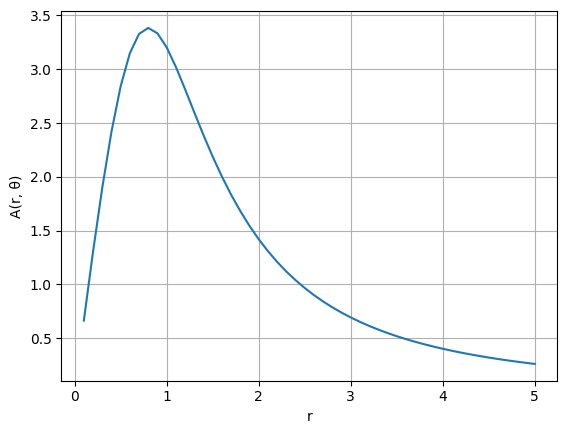

In [77]:
a=1
I=3
r=np.linspace(0.1, 5.0)
A = np.zeros(len(r))
for i, r_  in enumerate(r):
  A[i] = Apotencial(r_, np.pi/4, a, I)

plt.plot(r,A)
plt.xlabel("r")
plt.grid()
plt.ylabel("A(r, θ)")